In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from bs4 import BeautifulSoup
import json

In [2]:
with open( '../Data/VAF_Data/p377_variant_summary.html', 'r') as mf:
    file = mf.read()

In [3]:
soup = BeautifulSoup(file, 'html.parser')

In [4]:
mysoup = soup.body.div.find_all("script")

In [5]:
mysoup = soup.body.div.find_all("script")[1].contents[0].strip()
mysoup

'{"columns":[{"label":["TARGET_NAME"],"name":[1],"type":["fctr"],"align":["left"]},{"label":["PATIENT"],"name":[2],"type":["fctr"],"align":["left"]},{"label":["CHR"],"name":[3],"type":["fctr"],"align":["left"]},{"label":["START"],"name":[4],"type":["int"],"align":["right"]},{"label":["END"],"name":[5],"type":["int"],"align":["right"]},{"label":["REF"],"name":[6],"type":["fctr"],"align":["left"]},{"label":["ALT"],"name":[7],"type":["fctr"],"align":["left"]},{"label":["GENE"],"name":[8],"type":["fctr"],"align":["left"]},{"label":["PROTEIN_CHANGE"],"name":[9],"type":["fctr"],"align":["left"]},{"label":["cDNA_CHANGE"],"name":[10],"type":["fctr"],"align":["left"]},{"label":["TARGET_VAF_MEAN"],"name":[11],"type":["dbl"],"align":["right"]},{"label":["Autotate_annot1"],"name":[12],"type":["fctr"],"align":["left"]},{"label":["Autotate_annot2"],"name":[13],"type":["fctr"],"align":["left"]},{"label":["VARIANT"],"name":[14],"type":["chr"],"align":["left"]},{"label":["sampleID_short"],"name":[15],"

In [6]:
table_dict = json.loads(mysoup)

for key in table_dict:
    print(key)

columns
data
options


In [7]:
columns = [stuff["label"][0] for stuff in table_dict["columns"]]

In [8]:
table_dict["data"]

data = []
for stuff in table_dict["data"]:
    rows = []
    for key in stuff:
        rows.append(stuff[key])
    data.append(rows)
    
variant_annotations = pd.DataFrame(data, columns = columns)
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01


In [9]:
#save supplied data
variant_annotations.to_csv('../Data/VAF_Data/MSK_VAFS.tsv', sep = '\t')

In [10]:
#Add in patient initials
variant_annotations['pat'] = variant_annotations['PATIENT']

init_dict = {
    'IID_H198302': 'EL',
    'IID_H198303': 'GR',
    'IID_H198304': 'RN'
}

variant_annotations['patient_init'] = variant_annotations['pat'].replace(init_dict)

In [11]:
#Add in cell type
variant_annotations['cel'] = variant_annotations['TARGET_NAME']
ct_dict = {
    'T01': 'BM',
    'T02': 'Mono',
    'T03': 'nBC',
    'T04': 'NE'
}

patients = variant_annotations['TARGET_NAME'].to_list()
cells = []
for pat in patients: 
    for a in ct_dict:
        #print(a, pat)
        x = (pat.split('_')[2])
        if a == x:
            cells.append(ct_dict[a])
            
cell_dict = dict(zip(patients, cells))   

variant_annotations['celltype'] = variant_annotations['cel'].replace(cell_dict)

variant_annotations = variant_annotations.drop(columns = ['cel', 'pat'])
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01,EL,BM
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01,EL,Mono
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01,EL,nBC
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01,EL,NE
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,EL,BM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01,GR,Mono
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01,GR,nBC
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01,RN,BM
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01,RN,Mono


In [12]:
#save annotated data
variant_annotations.to_csv('../Data/VAF_Data/MSK_VAFS_PT_CELL.tsv', sep = '\t')

In [106]:
#Add in PCR amplicon name
variant_annotations['Mean_VAF'] = pd.to_numeric(variant_annotations['TARGET_VAF_MEAN'], downcast = 'float')
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Amplicon,Mean_VAF
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01,EL,BM,p.N282K,0.410
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01,EL,Mono,p.N282K,0.395
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01,EL,nBC,p.N282K,0.437
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01,EL,NE,p.N282K,0.477
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,EL,BM,EL_TET2b,0.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01,GR,Mono,GR_TET2b,0.455
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01,GR,nBC,GR_TET2b,0.482
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01,RN,BM,RN_TET2a,0.332
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01,RN,Mono,RN_TET2a,0.374


In [16]:
prot = variant_annotations['PROTEIN_CHANGE'].drop_duplicates().to_list()
prot

['p.N282K',
 'p.Q685*',
 'p.Q1276*',
 'p.E890G',
 'p.I406T',
 'p.P95H',
 'p.?',
 'p.T396A',
 'p.V617F',
 'p.R368G',
 'p.L112V',
 'p.L639R',
 'p.R82G',
 'p.C1289Y',
 'p.Y1337*',
 'p.A285V',
 'p.P95R',
 'p.A187T',
 'p.L1065fs*1',
 'p.K1090fs*15',
 'p.A1224fs*2',
 'p.G1218fs*8']

In [30]:
meta = pd.read_excel('../Data/Amp_data/Amplicon_metadata_fixed.xlsx')
mut = meta['MUT_NAME'].to_list()
prot = meta['PROTEIN_CHANGE'].to_list()
amp_assign = dict(zip(prot, mut))
old = 'p.Q1276* aka p.Q1265*'
new = 'p.Q1276*'
amp_assign[new] = amp_assign.pop(old)
print(len(amp_assign), amp_assign)

11 {'p.P95H': 'EL_SRSF2', 'p.L1065fs*1': 'EL_TET2a', 'p.Q685*': 'EL_TET2b', 'p.T360M': 'EL_TGFB3_g', 'p.K1090fs*15': 'GR_TET2a', 'p.A1224fs*2': 'GR_TET2b', 'p.A187T': 'RN_RUNX1_g', 'p.P95R': 'RN_SRSF2', 'p.G1218fs*8': 'RN_TET2a', 'p.Y1337*': 'RN_TET2b_g', 'p.Q1276*': 'EL_CUX1'}


In [56]:
##ODO - fix GR SRSFs annotation - needs to be removed, no SRSF amplicon in dataset


variant_annotations['Amplicon'] = variant_annotations['PROTEIN_CHANGE'].replace(amp_assign)
variant_annotations_amps = variant_annotations.loc[variant_annotations['Amplicon'].isin(mut)]
#save annotated data for amplicons
variant_annotations_amps.to_csv('../Data/VAF_Data/MSK_VAFS_PT_CELL_AMPLICON.tsv', sep = '\t')
variant_annotations_amps

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Amplicon
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,EL,BM,EL_TET2b
5,IID_H198302_T02_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.496,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T02_01_TD01,EL,Mono,EL_TET2b
6,IID_H198302_T03_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.452,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T03_01_TD01,EL,nBC,EL_TET2b
7,IID_H198302_T04_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.502,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T04_01_TD01,EL,NE,EL_TET2b
8,IID_H198302_T01_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.084,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T01_01_TD01,EL,BM,EL_CUX1
9,IID_H198302_T02_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.074,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T02_01_TD01,EL,Mono,EL_CUX1
10,IID_H198302_T04_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.033,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T04_01_TD01,EL,NE,EL_CUX1
16,IID_H198302_T01_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.437,RESCUE,ONCOGENIC,SRSF2_p.P95H,T01_01_TD01,EL,BM,EL_SRSF2
17,IID_H198302_T02_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.441,RESCUE,ONCOGENIC,SRSF2_p.P95H,T02_01_TD01,EL,Mono,EL_SRSF2
18,IID_H198302_T03_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.438,AUTO_OK,ONCOGENIC,SRSF2_p.P95H,T03_01_TD01,EL,nBC,EL_SRSF2


In [34]:
mut

['EL_CUX1',
 'EL_SRSF2',
 'EL_TET2a',
 'EL_TET2b',
 'EL_TGFB3_c',
 'EL_TGFB3_g',
 'GR_TET2a',
 'GR_TET2b',
 'RN_RUNX1_c',
 'RN_RUNX1_g',
 'RN_SRSF2',
 'RN_TET2a',
 'RN_TET2b_c',
 'RN_TET2b_g']

In [60]:
#variant_annotations_amps['Mean_VAF'] = pd.to_numeric(variant_annotations_amps['TARGET_VAF_MEAN'], downcast = 'float')
#variant_annotations_amps

<ipython-input-60-d0c72871636c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_annotations_amps['Mean_VAF'] = pd.to_numeric(variant_annotations_amps['TARGET_VAF_MEAN'], downcast = 'float')


,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Amplicon,Mean_VAF
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,EL,BM,EL_TET2b,0.474
5,IID_H198302_T02_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.496,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T02_01_TD01,EL,Mono,EL_TET2b,0.496
6,IID_H198302_T03_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.452,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T03_01_TD01,EL,nBC,EL_TET2b,0.452
7,IID_H198302_T04_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.502,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T04_01_TD01,EL,NE,EL_TET2b,0.502
8,IID_H198302_T01_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.084,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T01_01_TD01,EL,BM,EL_CUX1,0.084
9,IID_H198302_T02_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.074,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T02_01_TD01,EL,Mono,EL_CUX1,0.074
10,IID_H198302_T04_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.033,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T04_01_TD01,EL,NE,EL_CUX1,0.033
16,IID_H198302_T01_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.437,RESCUE,ONCOGENIC,SRSF2_p.P95H,T01_01_TD01,EL,BM,EL_SRSF2,0.437
17,IID_H198302_T02_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.441,RESCUE,ONCOGENIC,SRSF2_p.P95H,T02_01_TD01,EL,Mono,EL_SRSF2,0.441
18,IID_H198302_T03_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.438,AUTO_OK,ONCOGENIC,SRSF2_p.P95H,T03_01_TD01,EL,nBC,EL_SRSF2,0.438


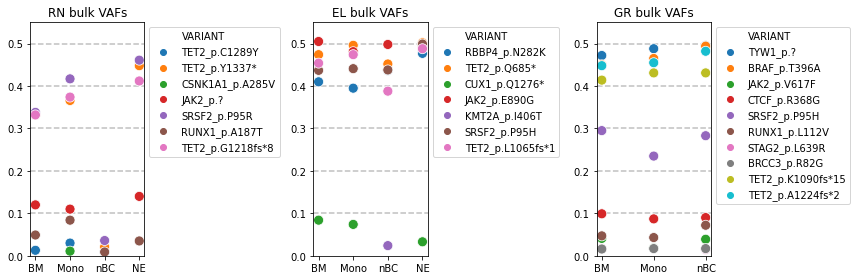

In [109]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))
patients = ['RN', 'EL', 'GR']


for count, patient in enumerate(patients):
    sns.scatterplot(x = 'celltype', y = ('Mean_VAF'), data = variant_annotations.loc[variant_annotations['patient_init'].isin([patient])], s = 100, hue = 'VARIANT', alpha = 1, ax = ax[count])
    ax[count].legend(loc = 'upper left', bbox_to_anchor = [1,1])
    ax[count].set_title(f'{patient} bulk VAFs') 
    ax[count].set_ylim(0,0.55)
    ax[count].axhline(0.1, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
        
fig.tight_layout()    

In [52]:
type(variant_annotations_amps.iloc[0,10])

str